# **Segmenting Consumers of Bath Soap**

BathSoapHousehold.csv is the dataset for this case study.

## **Business Situation**

CRISA is an Asian market research agency that specializes in tracking consumer purchase behavior in consumer goods (both durable and nondurable). In one major research project, CRISA tracks numerous consumer product categories (e.g., "detergents"), and, within each category, perhaps dozens of brands. To track purchase behavior, CRISA constituted household panels in over 100 cities and towns in India, covering most of the Indian urban market. The households were carefully selected using stratified sampling to ensure a representative sample; a subset of 600 records is analyzed here. The strata were defined on the basis of socioeconomic status and the market (a collection of cities).

CRISA has both transaction data (each row is a transaction) and household data (each row is a household), and for the household data it maintains the following infomation:

* Demographics of the households (updated annually)
* Possession of durable goods (car, washing machine, etc., updated annually; an "affluence index" is computed from this information)
* Purchase data of product categories and brands (updated monthly)

CRISA has two categories: (1) advertising agencies that subscribe to the database services, obtain updated data every month, and use the data to advise their clients on advertising and promotion strategies; (2) consumer goods manufacturers, which monitor their market share using the CRISA database.

## **Key Problems**

CRISA has traditionally segmented markets on the basis of purchaser demographics. They would now like to segment the market based on two key sets of variables more directly related to the purchase process and to brand loyalty:

1. Purchase behavior (volume, frequency, susceptibility to discounts, and brand loyalty)
2. Basis of purchase (price, selling proposition)

Doing so would allow CRISA to gain information about what demographic attributes are associated with different purchase behaviors and degrees of brand loyalty, and thus deploy promotion budgets more effectively. More effective market segmentation would enable CRISA's clients (in this case, a firm called IMRB) to design more cost-effective promotions targeted at appropriate segments. Thus, multiple promotions could be launched, each targeted at different market segmnets at different times of the year. This would result in a more cost-effective allocation of the promotion budget to different market segments. It would also enable IMRB to design more effective customer reward systems and therby increase brand loyalty.

## **Data**

The data in Table 21.8 profile each household, each row containing the data for one household.

## **Measuring Brand Loyalty**

Several variables in this case measure aspects of brand loyalty. The number of different brands purchased by the customer is one measure of loyalty. However, a consumer who purchases one or two brands in quick succession, then settles on a third for a long streak, is different than a consumer who constantly switches back and forth among three brands. Therefore, how often customers switch from one brand to another is another measure of loyalty. Yet a third perspective on the same issue is the proportion of purchases that go to different brands—a consumer who spends 90% of his or her purchase money on one brand is more loyal than a consumer who spends more equally among several brands.

All three of these components can be measured with the data in the purchase summary worksheet.

## **Assignment**

**1. Use *k*-means clustering to identify clusters of households based on:**









**(a) The variables that describe purchase behavior (including brand loyalty)**



In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

df = pd.read_csv("BathSoapHousehold.csv")
df.head()

,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
0,1010010,4,3,10,1,4,4,2,4,1,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.028037,0.0,0.130841,0.339564
1,1010020,3,2,10,2,2,4,4,2,1,...,0.347048,0.026834,0.016100,0.014311,0.0,0.059034,0.000000,0.0,0.080501,0.000000
2,1014020,2,3,10,2,4,5,6,4,1,...,0.121212,0.033550,0.010823,0.008658,0.0,0.000000,0.016234,0.0,0.561688,0.003247
3,1014030,4,0,0,0,4,0,0,5,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.600000,0.000000
4,1014190,4,1,10,2,3,4,4,3,1,...,0.000000,0.000000,0.048193,0.000000,0.0,0.000000,0.000000,0.0,0.144578,0.000000


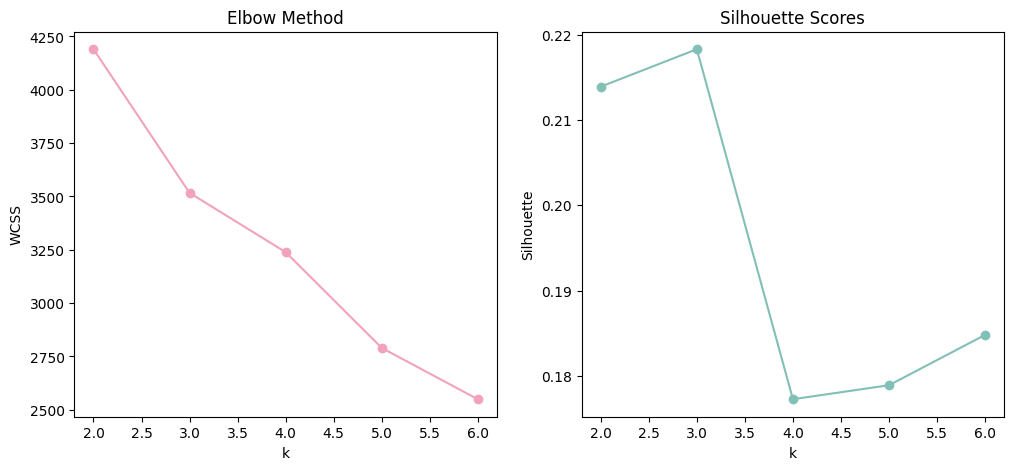

                           No. of Brands  Brand Runs  Total Volume  \
Cluster_purchase_behavior                                            
0                               2.893836   10.729452   7419.708904   
1                               2.511364    8.659091  21418.238636   
2                               5.072727   25.254545  14079.554545   

                           No. of  Trans        Value  Trans / Brand Runs  \
Cluster_purchase_behavior                                                   
0                              21.051370   858.140240            2.184795   
1                              27.761364  1986.279545            5.728068   
2                              45.918182  1713.919591            1.948364   

                             Vol/Tran  Avg. Price   Brand_Loyalty_HHI  
Cluster_purchase_behavior                                              
0                          365.497397    12.144589           0.000063  
1                          811.727727     9.038

In [26]:
purchase_vars = [
    'No. of Brands',
    'Brand Runs',
    'Total Volume',
    'No. of  Trans',
    'Value',
    'Trans / Brand Runs',
    'Vol/Tran',
    'Avg. Price '
]

brand_cols = [
    'Br. Cd. 57, 144',
    'Br. Cd. 55',
    'Br. Cd. 272',
    'Br. Cd. 286',
    'Br. Cd. 24',
    'Br. Cd. 481',
    'Br. Cd. 352',
    'Br. Cd. 5',
    'Others 999'
]


brand_share_matrix = df[brand_cols] / 100
df["Brand_Loyalty_HHI"] = (brand_share_matrix ** 2).sum(axis=1)

purchase_df = df[purchase_vars + ['Brand_Loyalty_HHI']]

scaler = StandardScaler()
X = scaler.fit_transform(purchase_df)

wcss = []
sil = []

for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)
    sil.append(silhouette_score(X, km.labels_))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(range(2,7), wcss, marker='o', c='#F2A2BD') #glinda
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("WCSS")

plt.subplot(1,2,2)
plt.plot(range(2,7), sil, marker='o', c='#82BFB7') #elphaba
plt.title("Silhouette Scores")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.show()

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

df["Cluster_purchase_behavior"] = clusters

print(df.groupby("Cluster_purchase_behavior")[purchase_vars + ['Brand_Loyalty_HHI']].mean())


In order to segment households by purchase behavior, I selected variables that are related to buying patterns and brand loyalty:
* No. of Brands
* Brand Runs
* Total Volume
* No. of Trans
* Value
* Trans / Brand Runs
* Vol/Tran
* Avg. Price
* Brand_Loyalty_HHI (derived)

The first eight variables measure purchase frequency, volume, spending, and price sensitivity. The HHI brand loyalty index summarizes brand loyalty by capturing how concentrated each household's purchases are among brands.

I ran k-means for k = 2 through k = 6 and examined the elbow plot and silhouette scores. The elbow plot showed a large reduction in within-cluster variance from k = 2 to k = 3, and then decreased more gradually suggesting diminishing returns beyond 3 clusters. The silhouette scores also peaked at k = 3, indicating that this solution provides the best separation between clusters. Since the marketing context recommends indentifying 2-5 segments, the statistically optimal and business-reasonable choice is k = 3 clusters for the purchase-behavior segmentation.

**Summary of the 3 Cluster Groups:**

Households in **Cluster 0** buy small amounts, infrequently, usually sticking to 2-3 brands with moderate loyalty. They appear to be light buyers, possibly budget-conscious or smaller families. Not highly brand loyal but not heavy churners either.

Households in **Cluster 1** are heavy, loyal, bulk-buying households. They consistently buy large quantities in fewer trips and tend to stick to 2-3 brands. They prefer value-priced products which helps to explain the low average price.

Households in **Cluster 2** are brand explorers. They buy many brands, shop frequently, and have complex switching behavior. Not particularly price-sensitive. Their high number of brand runs indicates rapid shifts between brands.

---

**(b) The variables that describe the basis for purchase**

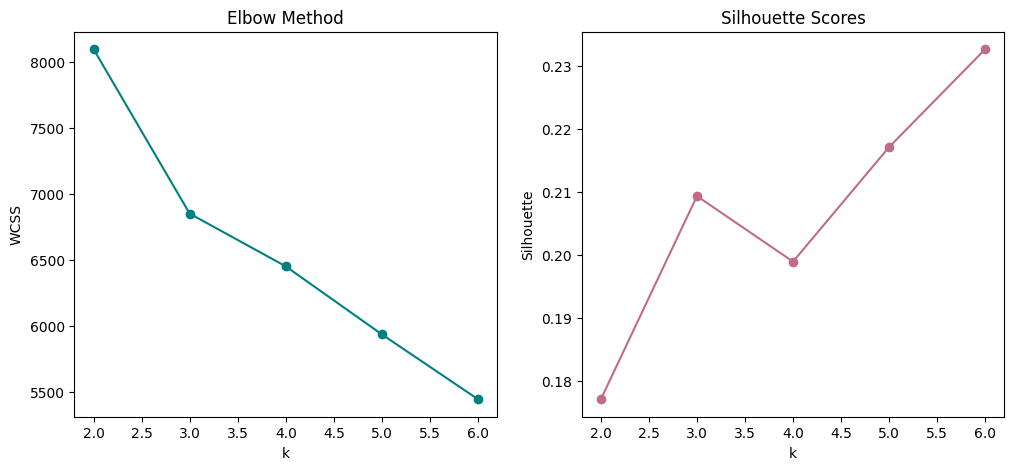

,Pr Cat 1,Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
Cluster_basis_purchase,,,,,,,,,,,,,,,
0,0.488175,0.469823,0.023733,0.018269,0.244820,0.148724,0.191791,0.149550,0.035462,0.039836,0.051371,0.011494,0.059045,0.022747,0.045158
1,0.181752,0.603337,0.056203,0.158708,0.710207,0.056049,0.049249,0.046578,0.030327,0.010880,0.019037,0.003411,0.005336,0.053199,0.015727
2,0.058769,0.154651,0.760419,0.026160,0.117063,0.069607,0.009858,0.011758,0.019733,0.000557,0.006539,0.001943,0.002668,0.753936,0.006339


In [27]:
price_vars = ['Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4']

proposition_vars = [
    'PropCat 5', 'PropCat 6', 'PropCat 7', 'PropCat 8', 'PropCat 9',
    'PropCat 10', 'PropCat 11', 'PropCat 12', 'PropCat 13',
    'PropCat 14', 'PropCat 15'
]

basis_df = df[price_vars + proposition_vars]

scaler = StandardScaler()
X = scaler.fit_transform(basis_df)

wcss = []
sil = []

for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)
    sil.append(silhouette_score(X, km.labels_))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(range(2,7), wcss, marker='o', c='#008080') #pretty colors
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("WCSS")

plt.subplot(1,2,2)
plt.plot(range(2,7), sil, marker='o', c='#C06C84') #pretty colors 2.0
plt.title("Silhouette Scores")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.show()

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters_b = kmeans.fit_predict(X)

df["Cluster_basis_purchase"] = clusters_b

summary = df.groupby("Cluster_basis_purchase")[price_vars + proposition_vars].mean()
summary


In order to segment households by the basis for purchase, I selected Pr Cat 1-4 and PropCat 5-15.

These variables measure how much households buy, how often they buy products, how loyal they are, what price tier they prefer and what benefits they prefer.

Again, I ran k-means for k = 2 through k = 6 and examined the elbow plot and silhouette scores. The elbow plot showed a large reduction in within-cluster variance from k = 2 to k = 3 and the silhouette scores also peaked at k = 3, indicating that this solution provides the best separation between clusters. The best compromise between interpretability and statistical quality is again k = 3.

**Summary of the 3 Cluster Groups:**

Households in **Cluster 0** purhcase across multiple benefit types with no strong single preference. Cluster 0 are balanced shoppers; they prefer affordable soaps, but not strictly the cheapest, and appear open to various options without strongly committing to a single kind.

Households in **Cluster 1** are benefit-driven buyers. Their choices are determined overwhelmingly by one specific purpose, PropCat5 likely representing a strong selling feature such as "herbal", "moisturizing", "family care", or something else depending on the dataset coding. Cluster 1 does not tend to buy the cheapest as the care more about the overall value of the product.

Households in **Cluster 2** overwhelmingly buy higher-priced products specifically if they have a premium quality such as a specialty scent, a luxury feel, or are an imported product. Although they tend to buy higher-priced products, price is not their main concern; they care more about specific premium benefits that often correlate with being high-end products.

---

**(c) The variables that describe both purchase behavior and basis of purchase**


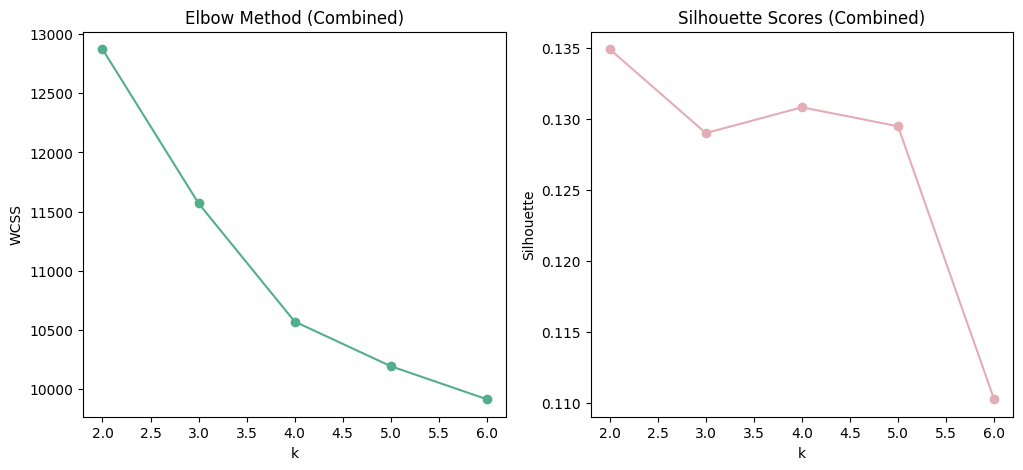

,No. of Brands,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,Brand_Loyalty_HHI,Pr Cat 1,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
Cluster_combined,,,,,,,,,,,,,,,,,,,,,
0,5.098522,25.187192,14997.275862,45.472906,1780.872709,1.912167,353.384680,12.049852,0.000047,0.264393,...,0.143762,0.100337,0.100167,0.044001,0.013405,0.042833,0.005999,0.020243,0.080479,0.039849
1,2.866029,10.741627,11582.440191,23.794258,1181.500957,2.682727,499.246124,10.448852,0.000064,0.115004,...,0.036315,0.093610,0.057942,0.027444,0.005453,0.034918,0.002086,0.001880,0.039880,0.025576
2,2.714286,7.428571,12562.714286,23.600000,846.691429,5.319429,542.874714,6.900857,0.000069,0.055106,...,0.051105,0.007810,0.007593,0.022194,0.000645,0.007129,0.001672,0.001929,0.801147,0.003192
3,3.033898,13.330508,6816.059322,24.033898,1141.632203,2.113983,296.186186,16.846102,0.000066,0.727602,...,0.127486,0.149713,0.128082,0.019167,0.069855,0.009561,0.016604,0.087503,0.009627,0.013396


In [28]:
purchase_vars = [
    'No. of Brands', 'Brand Runs', 'Total Volume',
    'No. of  Trans', 'Value', 'Trans / Brand Runs',
    'Vol/Tran', 'Avg. Price ', 'Brand_Loyalty_HHI'
]

brand_cols = [
    'Br. Cd. 57, 144', 'Br. Cd. 55', 'Br. Cd. 272',
    'Br. Cd. 286', 'Br. Cd. 24', 'Br. Cd. 481',
    'Br. Cd. 352', 'Br. Cd. 5', 'Others 999'
]

brand_share_matrix = df[brand_cols] / 100
df["Brand_Loyalty_HHI"] = (brand_share_matrix ** 2).sum(axis=1)

price_vars = ['Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4']

proposition_vars = [
    'PropCat 5', 'PropCat 6', 'PropCat 7', 'PropCat 8', 'PropCat 9',
    'PropCat 10', 'PropCat 11', 'PropCat 12', 'PropCat 13',
    'PropCat 14', 'PropCat 15'
]

combined_vars = purchase_vars + price_vars + proposition_vars
combined_df = df[combined_vars]

scaler = StandardScaler()
X = scaler.fit_transform(combined_df)

wcss = []
sil = []

for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)
    sil.append(silhouette_score(X, km.labels_))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(range(2,7), wcss, marker='o', c='#53AF8B') #elphaba 2.0
plt.title("Elbow Method (Combined)")
plt.xlabel("k")
plt.ylabel("WCSS")

plt.subplot(1,2,2)
plt.plot(range(2,7), sil, marker='o', c='#E3ADB5') #glinda 2.0
plt.title("Silhouette Scores (Combined)")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.show()

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters_c = kmeans.fit_predict(X)

df["Cluster_combined"] = clusters_c

summary_c = df.groupby("Cluster_combined")[combined_vars].mean()
summary_c


In order to segment households by  both purchase behavior and basis of purchase, I combined both the purchase-behavior variables and basis-of-purchase variables used in the previous questions.


Once again, I ran k-means for k = 2 through k = 6 and examined the elbow plot and silhouette scores. The elbow plot showed a large reduction in within-cluster variance from k = 2 to k = 3 as well as a moderate drop from k = 3 to k = 4. Silhouette scores peaked at k = 2, but k = 4 is also very close. To get the best of both worlds I used k = 4 because it gives better differentiation, is statistically reasonable, and has much more interpretable results than having only 2 clusters.

**Summary of the 4 Cluster Groups:**

Households in **Cluster 0** shop frequently, use many brands, respond to multiple benefit types and tend to stay in low to mid price tiers. This leads me to believe that they are "experimental" buyers.

Households in **Cluster 1** buy moderately, prefer mid-priced soaps, are not benefit-loyal, and have more stable buying patterns than Cluster 0. I'm calling these people the "practical" buyers.

Households in **Cluster 2** buy almost exclusively premium-tier soaps, are strongly loyal to luxury, beauty and fragrance and have a moderate purchase volume. This leaves me to label this as the "snobs".

Households in **Cluster 3** buy infrequently, keep volume low, choose almost exclusively low-price soaps and their proposition preferences are scattered. As I'm running out of titles, I'm calling this cluster the "cheapskates".

(Obviously these titles are not very fact based beyond a general scope, so take that as you will.)

---



**Note 1:** How should *k* be chosen? Think about how the clusters would be used. It is likely that the marketing efforts would support two to five different promotional approaches.

*I chose the k-value based on a combination of the elbow method, silhouette scores, and marketing feasibility. This led me to choose k = 3 for question 1a, k = 3 for question 1b, and k = 4 for question 1c.*

---

**Note 2:** How should the percentages of total purchases comprised by various brands be treated? Isn't a customer who buys all brand A just as loyal as a customer who buys all brand B? What will be the effect on any distance measure of using the brand share variables as is? Consider using a single derived variable.

*The dataset contains multiple variables representing the percentages of total volume purchased from various brands. If used directly, these variables can distort distance calculations in k-means clustering.*

*A customer who buys 100% Brand A and a customer who buys 100% Brand B would appear very far apart numerically, even though they are equally loyal in behavioral terms.*
*K-means mistakenly treats "Brand A vs. Brand B" as meaningful differences, even though brand labels are categorical, not numeric.*
*Distances between households would depend on which specific brand they buy rather than the degree of loyalty, which is the true behavioral construct.*

*To avoid this distortion, I replaced the full set of brand percentage variables with a single derived loyalty index, the Herfindahl-Hirschman Index (HHI), defined as the sum of squared brand shares. The HHI captures how concentrated a household's purchases are across brands with a high HHI meaning a strong loyalty and a low HHI representing a variety seeking tendency. Using this single derived variable ensures that clustering reflects true brand loyalty patterns, not arbitrary brand codes. I applied this method consistently across all three clustering questions (1a, 1b, and 1c).*

---

---

**2. Select what you think is the best segmentation and comment on the characteristics (demographic, brand loyalty, and basis for purchase) of these clusters. (This information would be used to guide the development of advertising and promotional campaigns.)**

I would say that the best overall segmentation is the one created in question 1c because this model captured purchase behavior, brand loyalty, and basis of purchase simultaneously.

**Cluster 0:**

This cluster has the highest number of brands purchased and highest brand runs, highest transaction count and high total volume, moderate loyalty shown by a low HHI (meaning they switch brands frequently), prefers low and mid price tiers, and spreads purchases across multiple proposition categories.

This translates into saying that these households are experimental buyers who shop frequently, try many brands, and respond to a variety of selling propositions. They are not highly sensitive but avoid the premium tier. This cluster would most likely be receptive to promotions, new product launches, and benefit-based messaging.

**Cluster 1:**

This cluster has moderate purchase volume and transaction frequency, a low number of brands purchased with relatively stable buying patterns, favors mid-priced soaps, has no strong dependence on a single proposition category, and has a moderate level of brand loyalty.

The households in this cluster are practical buyers who purchase consistently but not aggressively. They do not tend to explore many brands or propositions, and price matters to them although it does not drive them exclusively to the lowest tier. This cluster is most well-suited to steady, value-oriented messaging and can be targeted with reliable, everyday-use products.

**Cluster 2:**

This cluster has a strong preferene for the premium price tier, a high concentration of purchases in PropCat14 based on luxury and fragrance, high brand loyalty compared to the other clusters, and a moderate total volume and transaction frequency.

These households are premium-oriented shoppers who buy almost exclusively high-end soaps with a strong preference for luxury or beauty-driven benefits. They display consistent proposition loyalty and lower price sensitivity. This cluster is predicted to do well with marketing focused on prestige, fragrance, indulgence, and premium packaging.

**Cluster 3:**

This cluster has the lowest purchase volume, lowest transaction frequency, prefers almost exclusively low-price soaps, no dominant category for proposition preferences, and pays the lowest average price among all four clusters.

These households are budget-conscious buyers who purchase infrequently, keep volume low, and prioritize low price above benefits. Their scattered proposition preferences suggests that functional value outweighs brand or benefit positioning. Promotions, discounts, and affordability messaging are most likely to be effective with this cluster specifically.



---

**3. Develop a model that classifies the data into these segments. Since this information would most likely be used in targeting direct-mail promotions, it would be useful to select a market segment that would be defined as a success in the classification model. Note, we covered in class how CART model can be used for multi-class classification as well.**


Accuracy: 0.9833333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       151
           1       0.93      0.97      0.95        29

    accuracy                           0.98       180
   macro avg       0.96      0.98      0.97       180
weighted avg       0.98      0.98      0.98       180



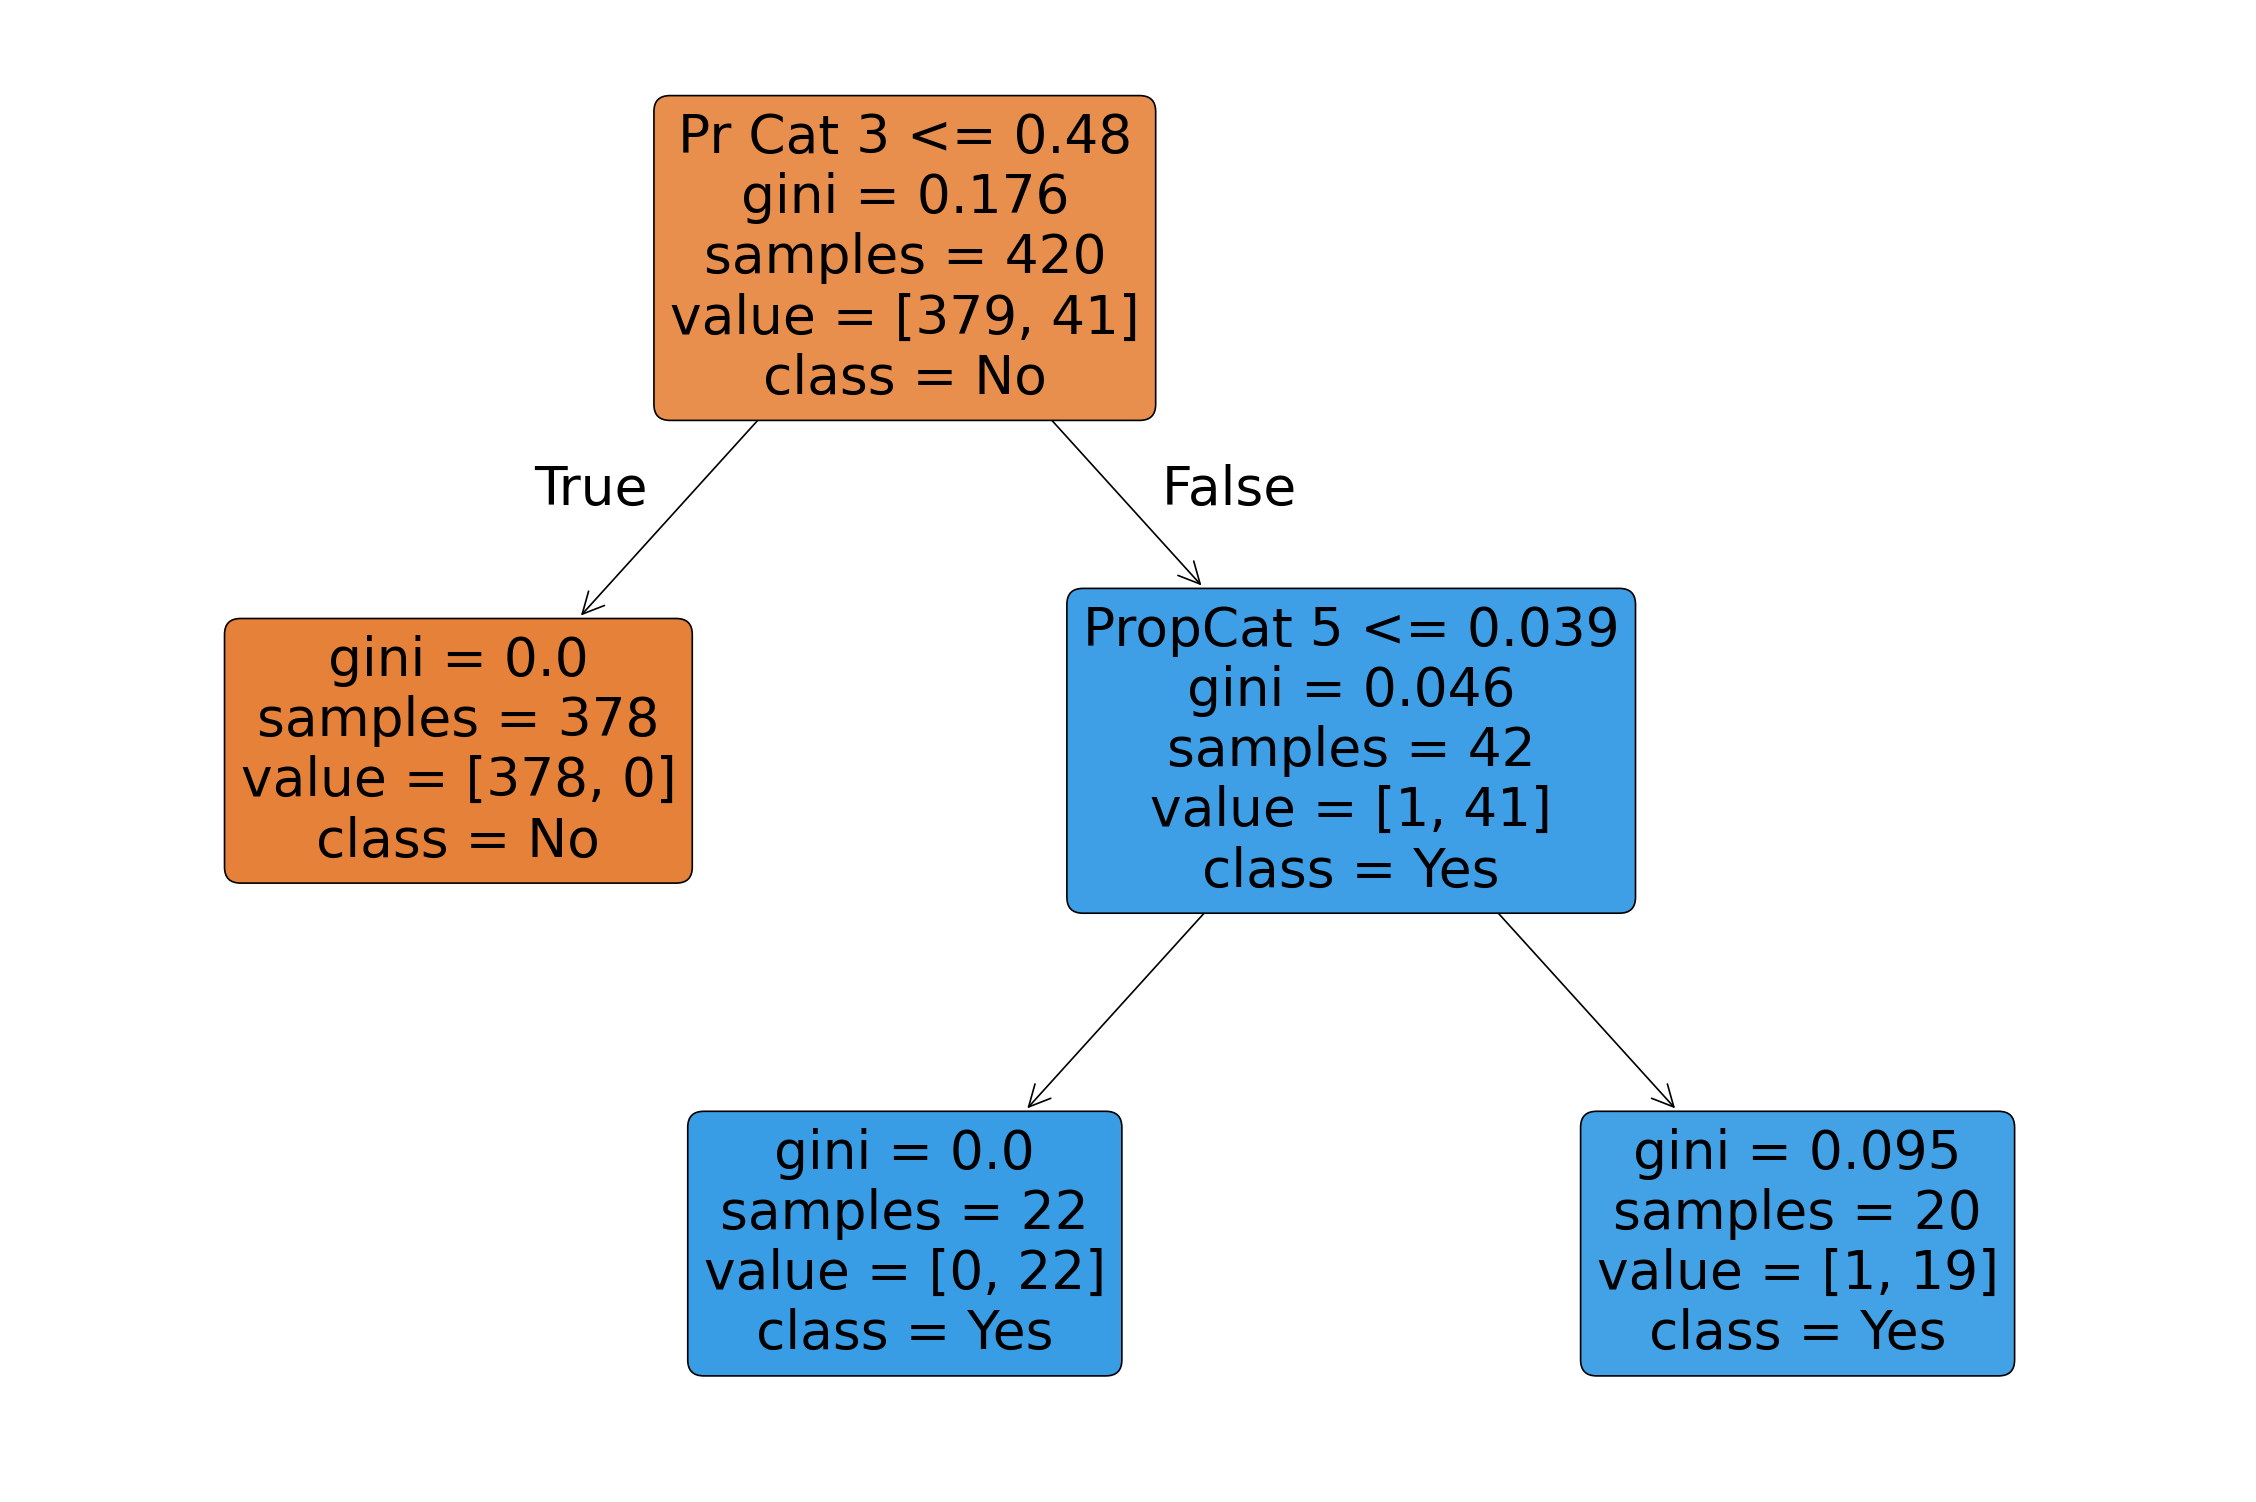

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

df['success'] = (df['Cluster_combined'] == 2).astype(int)

drop_cols = ['Member id', 'Cluster_combined', 'success']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['success']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

cart = DecisionTreeClassifier(
    max_depth=6,
    min_samples_leaf=20,
    random_state=42
)

cart.fit(X_train, y_train)

y_pred = cart.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(24, 16), dpi=120)

plot_tree(
    cart,
    feature_names=X.columns,
    filled=True,
    class_names=["No", "Yes"],
    fontsize=32,
    rounded=True,
    proportion=False
)

plt.show()

After fitting the CART model, the accuracy had an f1-value of 0.98 and identifies the most influential predictors to be average price, number of brands, brand runs, promotion volume percentage, price category 2 share, and the affluence index. These variables align well with marketing intuition, consumer's brand loyalty, price sensitivity, and promotion responsiveness strongly predcit their cluster assignment.

THe classification model would allow CRISA to score every household in the database, predict which households belong to the "high-value success" cluster, and target certain households with tailored promotions, loyalty rewards, and higher-value brand campaigns which will hopefully lead to a more efficient allocation of the marketing budget and higher overall expected ROI.

---



TABLE 21.8 DESCRIPTION OF VARIABLES FOR EACH HOUSEHOLD

| Variable Type | Variable Name | Description |
| :------- | :------ | :------- |
| Member ID  | Member id  | Unique identifier for each household |
| Demographics  | SEC  | Socioeconomic class (1 = high, 5 = low)  |
|    | FEH  | Eating habits (1 = vegetarian, 2 = vegetarian but eat eggs, 3 = nonvegetarian, 0 = not specified  |
|   | MT  | Native language (see table in worksheet)  |
|   | SEX  | Gender of homemaker (1 = male, 2 = female)  |
|   | AGE  | Age of homemaker  |
|   | EDU  | Education of homemaker (1 = minimum, 9 = maximum)  |
|   | HS  | Number of members in household  |
|   | CHILD  | Presence of children in household (4 categories)  |
|   | CS  | Television availability (1 = available, 2 = unavailable)  |
|   | Affluence Index  | Weighted value of durables possessed  |
| Purchase summary over the period  | No. of Brands  | Number of brands purchased  |
|   | Brand Runs  | Number of instances of consecutive purchase of brands  |
|   | Total Volume  | Sum of volume  |
|   | No. of Trans  | Number of purchase transactions (multiple brands purchased in a month are counted as seperate transactions)  |
|   | Value  | Sum of value  |
|   | Trans / Brand Runs  | Average transactions per brand run  |
|   | vol / Trans  | Average volume per transaction  |
|   | Avg. Price  | Average price of purchase  |
| Purchase within promotion  | Pur Vol  | Percent of volume purchased  |
|   | No Promo - %  | Percent of volume purchased under no promotion  |
|   | Pur Vol Promo 6%  | Percent of volume purchased under promotion code 6  |
|   | Pur Vol Other Promo %  | Percent of volume purchased other promotions  |
| Brandwise purchase  | Br. Cd. (57, 144, 55, 272, 286, 24, 481, 352, 5, and 999 others)  | Percent of volume purchased of the brand  |
| Price categorywise purchase  | Price Cat 1 to 4  | Percent of volume purchased under the price category  |
| Selling propositionwise purchase  | Proposition Cat 5 to 15  | Percent of volume purchased under the product proposition category  |